In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Diccionario de los Datos:

```
survival:	Survival	{0 = No, 1 = Yes}
pclass:	Ticket class	{1 = 1st, 2 = 2nd, 3 = 3rd}
sex:	Sex
Age:	Age in years
sibsp:	Number of siblings / spouses aboard the Titanic
parch:	Number of parents / children aboard the Titanic
ticket:	Ticket number
fare:	Passenger fare
cabin:	Cabin number
embarked:	Port of Embarkation	{C = Cherbourg, Q = Queenstown, S = Southampton}

```



Ejercicio 1. Carga el conjunto de datos "Titanic" de Seaborn. Calcula la media, mediana y moda de las edades de los pasajeros a bordo.

In [4]:
# Calcula la media
media = df['age'].mean()

# Calcula la mediana
mediana = df['age'].median()

# Calcula la moda
moda = df['age'].mode()

print("Media de las edades:", media)
print("Mediana de las edades:", mediana)
print("Moda de las edades:", moda)

Media de las edades: 29.69911764705882
Mediana de las edades: 28.0
Moda de las edades: 0    24.0
Name: age, dtype: float64


Ejercicio 2. Calcula la media y la desviación estándar de las tarifas pagadas por los pasajeros en cada clase (primera, segunda y tercera)

In [5]:
# Agrupa por la columna 'pclass' y calcula la media y la desviación estándar de las tarifas
medias_por_clase = df.groupby('pclass')['fare'].mean()
desviaciones_estandar_por_clase = df.groupby('pclass')['fare'].std()

# Imprime los resultados
print("Media de tarifas por clase:")
print(medias_por_clase)
print("\nDesviación estándar de tarifas por clase:")
print(desviaciones_estandar_por_clase)

Media de tarifas por clase:
pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

Desviación estándar de tarifas por clase:
pclass
1    78.380373
2    13.417399
3    11.778142
Name: fare, dtype: float64


Ejercicio 3. Arma un histograma para visualizar la distribución de las edades de los pasajeros.

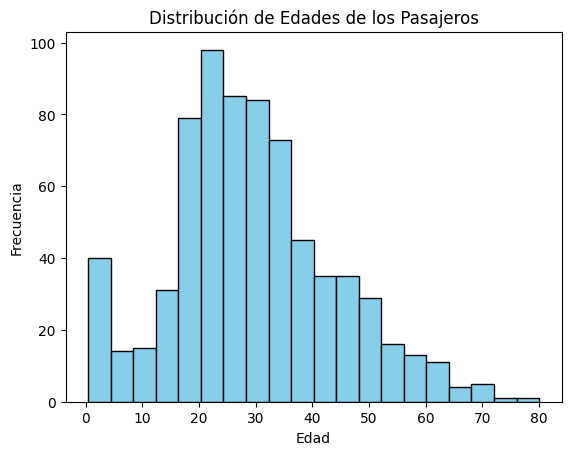

In [6]:
# Crear el histograma de las edades
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')

# Agregar etiquetas y título
plt.title('Distribución de Edades de los Pasajeros')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

Ejercicio 4. Crea un boxplot (diagrama de caja) de las tarifas pagadas por los pasajeros en función del puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

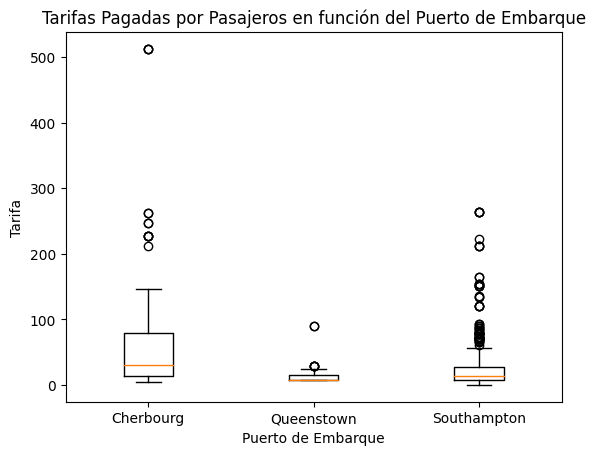

In [7]:
# Crear el boxplot
plt.boxplot([df[df['embarked'] == 'C']['fare'],
             df[df['embarked'] == 'Q']['fare'],
             df[df['embarked'] == 'S']['fare']],
            labels=['Cherbourg', 'Queenstown', 'Southampton'])

# Agregar etiquetas y título
plt.title('Tarifas Pagadas por Pasajeros en función del Puerto de Embarque')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Tarifa')

# Mostrar el boxplot
plt.show()

Ejercicio 5. Calcula los percentiles 25, 50 y 75 de las edades de los pasajeros.

In [8]:
# Calcula los percentiles
percentil_25 = df['age'].quantile(0.25)
percentil_50 = df['age'].quantile(0.50)
percentil_75 = df['age'].quantile(0.75)

print("Percentil 25 de las edades:", percentil_25)
print("Percentil 50 (Mediana) de las edades:", percentil_50)
print("Percentil 75 de las edades:", percentil_75)

Percentil 25 de las edades: 20.125
Percentil 50 (Mediana) de las edades: 28.0
Percentil 75 de las edades: 38.0


Ejercicio 6. Calcula la proporción de pasajeros que sobrevivieron y fallecieron en función de su sexo



In [12]:
# Agrupa por sexo y cuenta el número de sobrevivientes y fallecidos en cada grupo
sobrevivientes_por_sexo = df.groupby('sex')['survived'].sum()
total_por_sexo = df.groupby('sex')['survived'].count()

# Calcula la proporción de sobrevivientes y fallecidos en cada grupo
proporcion_sobrevivientes = sobrevivientes_por_sexo / total_por_sexo
proporcion_fallecidos = 1 - proporcion_sobrevivientes  # Restamos la proporción de sobrevivientes para obtener la de fallecidos

print("Proporción de pasajeros que sobrevivieron según el sexo:")
print(proporcion_sobrevivientes)

print("\nProporción de pasajeros que fallecieron según el sexo:")
print(proporcion_fallecidos)

Proporción de pasajeros que sobrevivieron según el sexo:
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

Proporción de pasajeros que fallecieron según el sexo:
sex
female    0.257962
male      0.811092
Name: survived, dtype: float64


Ejercicio 7. Calcula la media de las tarifas pagadas por los pasajeros en cada clase y separada por sexo




In [13]:
# Agrupa por clase y sexo, luego calcula la media de las tarifas para cada grupo
media_tarifas_por_clase_y_sexo = df.groupby(['pclass', 'sex'])['fare'].mean()

print("Media de las tarifas pagadas por los pasajeros en cada clase y separada por sexo:")
print(media_tarifas_por_clase_y_sexo)


Media de las tarifas pagadas por los pasajeros en cada clase y separada por sexo:
pclass  sex   
1       female    106.125798
        male       67.226127
2       female     21.970121
        male       19.741782
3       female     16.118810
        male       12.661633
Name: fare, dtype: float64


Ejercicio 8. Calcula la media y la desviación estándar de las tarifas pagadas por los pasajeros en cada clase (primera, segunda y tercera) y separada por grupos de edades (niños, adultos y ancianos).

In [15]:
# Define los límites de edad para los grupos
limite_ninos = 12
limite_ancianos = 65

# Define una función para asignar cada pasajero a un grupo de edad
def grupo_edad(edad):
    if edad <= limite_ninos:
        return 'Niños'
    elif edad <= limite_ancianos:
        return 'Adultos'
    else:
        return 'Ancianos'

# Agrega una nueva columna 'Grupo de Edad' al DataFrame
df['Grupo de Edad'] = df['age'].apply(grupo_edad)

# Agrupa por clase y grupo de edad, luego calcula la media y la desviación estándar de las tarifas para cada grupo
resultados = df.groupby(['pclass', 'Grupo de Edad'])['fare'].agg(['mean', 'std'])

print("Media y desviación estándar de las tarifas pagadas por los pasajeros en cada clase y separada por grupos de edades:")
print(resultados)

Media y desviación estándar de las tarifas pagadas por los pasajeros en cada clase y separada por grupos de edades:
                            mean        std
pclass Grupo de Edad                       
1      Adultos         88.037852  82.077169
       Ancianos        58.874018  53.277828
       Niños          126.239575  33.115279
2      Adultos         20.811661  13.457503
       Ancianos         8.327885   9.781344
       Niños           28.740200   7.894939
3      Adultos         11.470354   8.802593
       Ancianos        14.737468  15.310057
       Niños           24.634721  10.213841


Ejercicio 9. Calcula la proporción de pasajeros que sobrevivieron y fallecieron en función de su clase y el puerto de embarque.

In [16]:
# Agrupa por clase y puerto de embarque, luego calcula el número total de pasajeros, el número de sobrevivientes y el número de fallecidos para cada grupo
grupos = df.groupby(['pclass', 'embarked'])['survived'].agg(['count', 'sum'])

# Calcula la proporción de sobrevivientes y fallecidos para cada grupo
grupos['Proporción de Sobrevivientes'] = grupos['sum'] / grupos['count']
grupos['Proporción de Fallecidos'] = 1 - grupos['Proporción de Sobrevivientes']

print("Proporción de pasajeros que sobrevivieron y fallecieron en función de su clase y el puerto de embarque:")
print(grupos[['Proporción de Sobrevivientes', 'Proporción de Fallecidos']])


Proporción de pasajeros que sobrevivieron y fallecieron en función de su clase y el puerto de embarque:
                 Proporción de Sobrevivientes  Proporción de Fallecidos
pclass embarked                                                        
1      C                             0.694118                  0.305882
       Q                             0.500000                  0.500000
       S                             0.582677                  0.417323
2      C                             0.529412                  0.470588
       Q                             0.666667                  0.333333
       S                             0.463415                  0.536585
3      C                             0.378788                  0.621212
       Q                             0.375000                  0.625000
       S                             0.189802                  0.810198


Ejercicio 10. Calcula la media y la desviación estándar de las edades de los pasajeros agrupados por el tamaño de sus familias (solos, pequeñas familias y grandes familias).

In [18]:
# Define los límites para clasificar el tamaño de la familia
limite_pequena_familia = 4

# Define una función para asignar cada pasajero a un grupo de tamaño de familia
def tamano_familia(tamano):
    if tamano == 1:
        return 'Solos'
    elif tamano <= limite_pequena_familia:
        return 'Pequeñas Familias'
    else:
        return 'Grandes Familias'

# Calcula el tamaño de la familia sumando el número de padres/hijos a bordo y el número de hermanos/cónyuges a bordo
df['Tamano Familia'] = df['parch'] + df['sibsp'] + 1

# Aplica la función para clasificar el tamaño de la familia
df['Tamano Familia'] = df['Tamano Familia'].apply(tamano_familia)

# Agrupa por tamaño de la familia y luego calcula la media y la desviación estándar de las edades para cada grupo
resultados = df.groupby('Tamano Familia')['age'].agg(['mean', 'std'])

print("Media y desviación estándar de las edades de los pasajeros agrupados por el tamaño de sus familias:")
print(resultados)


Media y desviación estándar de las edades de los pasajeros agrupados por el tamaño de sus familias:
                        mean        std
Tamano Familia                         
Grandes Familias   17.843137  16.062842
Pequeñas Familias  28.101042  15.262028
Solos              32.220297  12.899871
